In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'walmart.xlsx'  # Adjust the path as needed
data = pd.read_excel(file_path)

# Display basic information
print("Dataset Head:")
print(data.head())
print("\nData Info:")
print(data.info())


Dataset Head:
         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport           NaN     Jessica Myrick   Small Business      0.10   
1       Bowie           NaN     Matt Collister      Home Office      0.08   
2        Napa           NaN  Alan Schoenberger        Corporate      0.00   
3  Montebello           NaN  Elizabeth Moffitt         Consumer      0.08   
4        Napa           NaN  Alan Schoenberger        Corporate      0.07   

   Number of Records Order Date  Order ID Order Priority  Order Quantity  ...  \
0                  1 2012-01-01     28774           High              32  ...   
1                  1 2012-01-01     13729  Not Specified               9  ...   
2                  1 2012-01-02     37537            Low               4  ...   
3                  1 2012-01-02     44069       Critical              43  ...   
4                  1 2012-01-02     37537            Low              43  ...   

    Profit Region Row ID    Sales  S

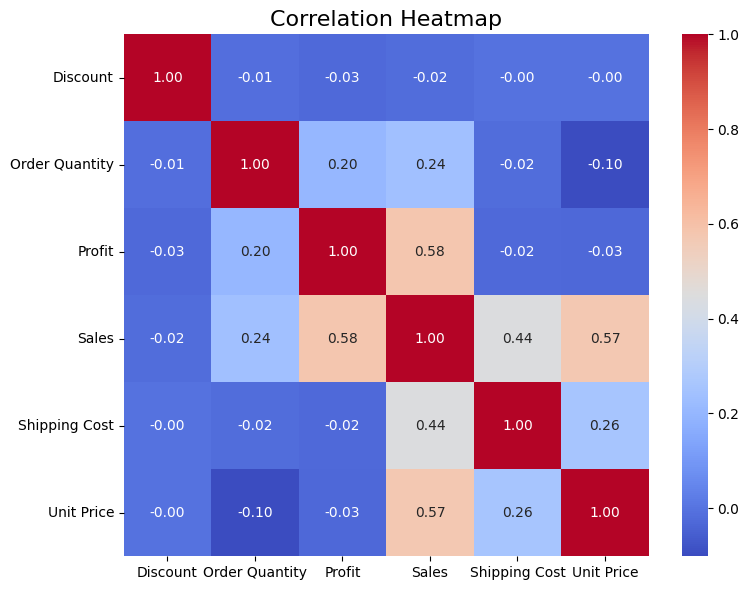

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Discount', 'Order Quantity', 'Profit', 'Sales', 'Shipping Cost', 'Unit Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-2-3e8e3b6f9309>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = time_series_data.resample('M').sum()


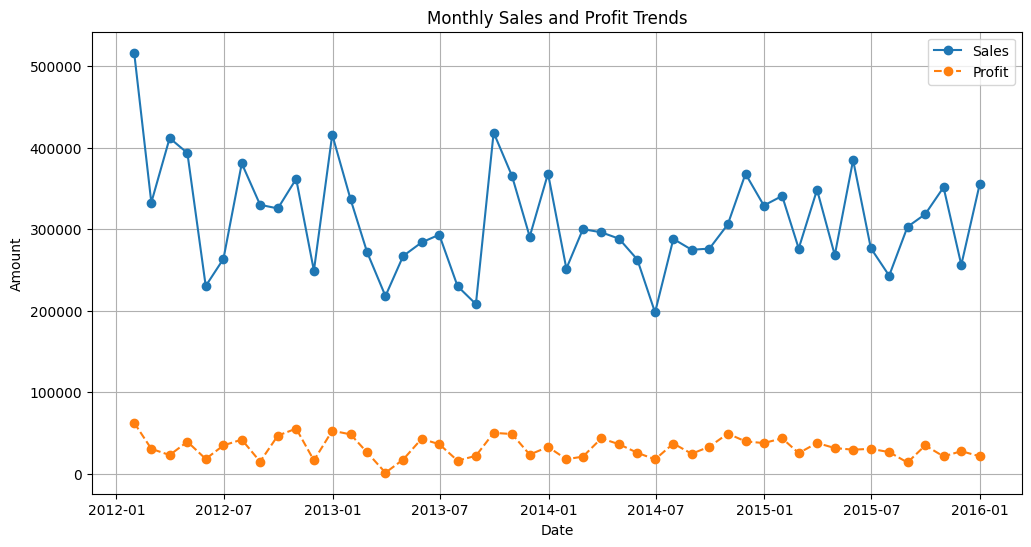

In [ ]:
# Set up necessary imports
import matplotlib.pyplot as plt
import seaborn as sns

# Set 'Order Date' as the time index
data['Order Date'] = pd.to_datetime(data['Order Date'])  # Ensure datetime format
data.set_index('Order Date', inplace=True)

# Select relevant columns
time_series_data = data[['Sales', 'Profit']]  # Adjust if another column is your target

# Handle missing values
# Fill missing 'Product Base Margin' with its median
data['Product Base Margin'] = data['Product Base Margin'].fillna(data['Product Base Margin'].median())

# Drop rows with remaining critical missing values
data.dropna(subset=['Customer Age'], inplace=True)

# Aggregate the data to monthly frequency
monthly_data = time_series_data.resample('M').sum()

# Plot the data to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Sales'], label='Sales', marker='o')
plt.plot(monthly_data['Profit'], label='Profit', marker='o', linestyle='--')
plt.title('Monthly Sales and Profit Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()


                 Sales
Order Date            
2012-01-01   1052.8400
2012-01-02  11101.8700
2012-01-03  31997.8555
2012-01-04   1254.2500
2012-01-05  39734.4040

Performing ADF Test...
ADF Statistic: -36.434228610030765
p-value: 0.0
Critical Values: {'1%': -3.4348399537053482, '5%': -2.8635230163107837, '10%': -2.5678257404326903}
The series is stationary.

Plotting ACF and PACF...


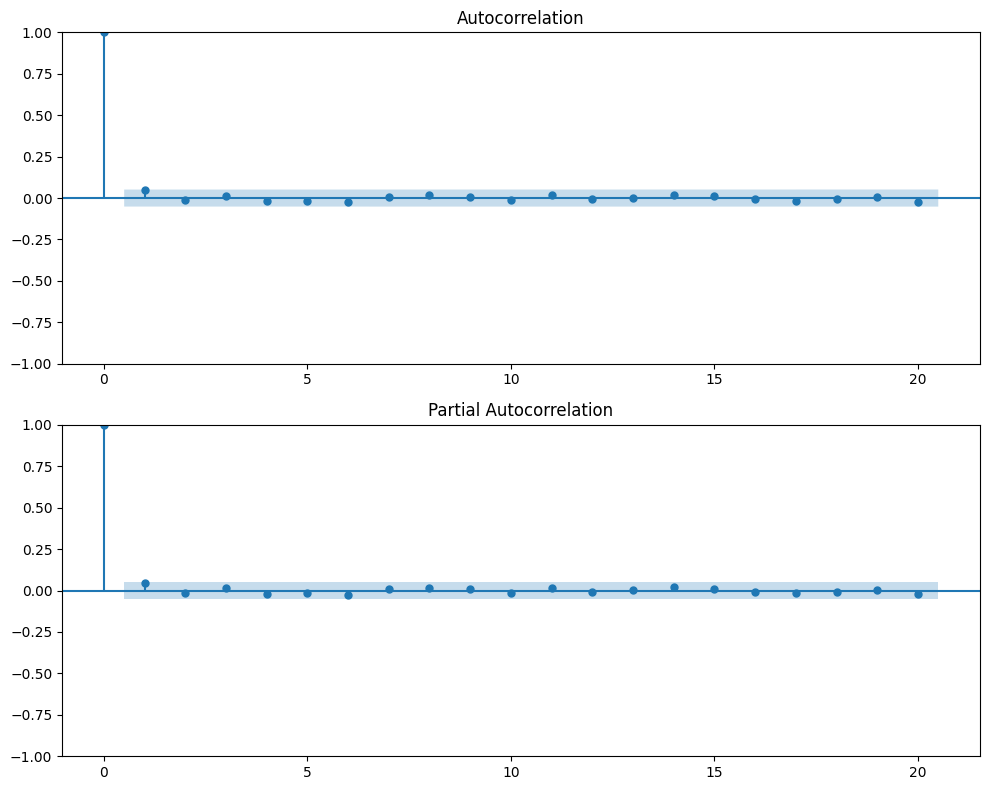


Detecting Outliers using Z-Score...
Outliers Detected:
                  Sales    Z-Score
Order Date                        
2012-01-07   52140.9085   3.939113
2012-01-22   50492.2040   3.784206
2012-03-21  117076.4140  10.040243
2012-04-09   48940.0390   3.638370
2012-09-04   54005.9630   4.114347
2012-10-20   69770.4605   5.595529
2012-12-05   52417.9200   3.965140
2012-12-12   51478.5770   3.876882
2013-01-09   46057.0400   3.367492
2013-02-27   52347.3180   3.958507
2013-04-20   52953.4130   4.015453
2013-06-25   48541.4520   3.600920
2013-09-12   43547.4900   3.131703
2013-09-14   45754.3400   3.339052
2013-09-29   51527.1100   3.881442
2013-10-22   55418.9300   4.247105
2014-02-05   43550.0985   3.131948
2014-03-15   46997.1005   3.455817
2014-09-04   47578.0100   3.510398
2014-11-19   62714.1195   4.932538
2015-02-27   43063.3075   3.086211
2015-03-02   43609.0065   3.137483
2015-05-21   49046.8095   3.648401
2015-08-07   75913.7460   6.172732
2015-12-02   71821.4720   5.788235

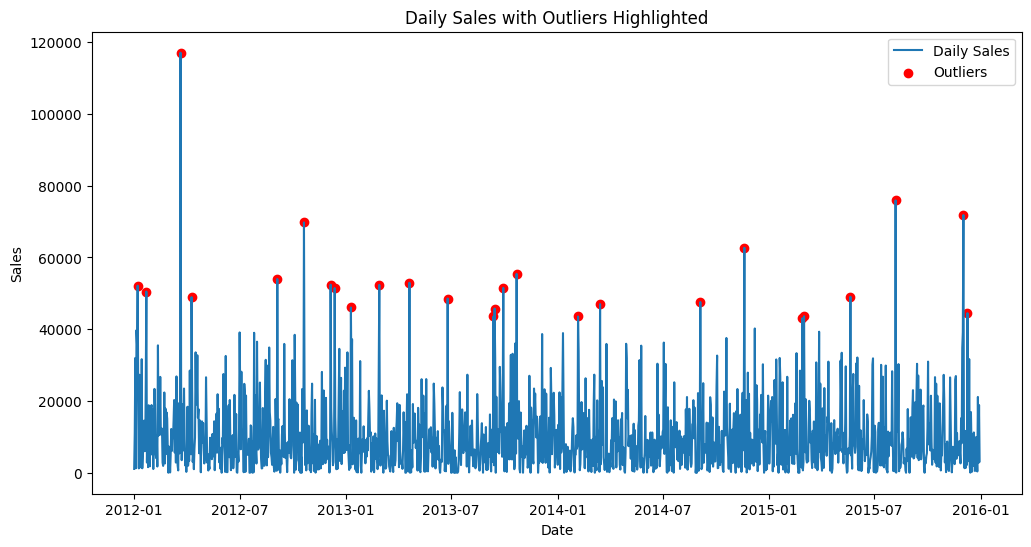

In [ ]:
# Install required libraries
!pip install pandas statsmodels matplotlib scipy

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/walmart.xlsx'  # Adjust the file path if necessary
df = pd.ExcelFile(file_path).parse('walmart Retail Data')

# Preprocess data: Extract 'Order Date' and 'Sales', and sort by date
time_series_data = df[['Order Date', 'Sales']].copy()
time_series_data = time_series_data.sort_values('Order Date')
time_series_data.set_index('Order Date', inplace=True)

# Resample to aggregate sales by day (if not already daily)
daily_sales = time_series_data.resample('D').sum()

# Check the processed time series data
print(daily_sales.head())

# --- Task 1: ADF Test ---
print("\nPerforming ADF Test...")
adf_result = adfuller(daily_sales['Sales'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

if adf_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

# --- Task 2: ACF and PACF Plots ---
print("\nPlotting ACF and PACF...")
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(daily_sales['Sales'], ax=ax[0], lags=20)
plot_pacf(daily_sales['Sales'], ax=ax[1], lags=20, method="ywm")
plt.tight_layout()
plt.show()

# --- Task 3: Outlier Detection using Z-Score ---
print("\nDetecting Outliers using Z-Score...")
z_scores = zscore(daily_sales['Sales'])
daily_sales['Z-Score'] = z_scores

# Identify outliers
outliers = daily_sales[(z_scores > 3) | (z_scores < -3)]
print(f"Outliers Detected:\n{outliers}")

# Plot sales with outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['Sales'], label='Daily Sales')
plt.scatter(outliers.index, outliers['Sales'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales with Outliers Highlighted')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Sample dataset
data = {'value': [10, 12, 14, 15, 100, 20, 22, 25, 18, 30, 250, 28, 22]}
df = pd.DataFrame(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]

# Display the outliers
print("Outliers detected:")
print(outliers)


Outliers detected:
    value
4     100
10    250


ARIMA Model - MAE: 39582.627083576655, RMSE: 44637.00759673587


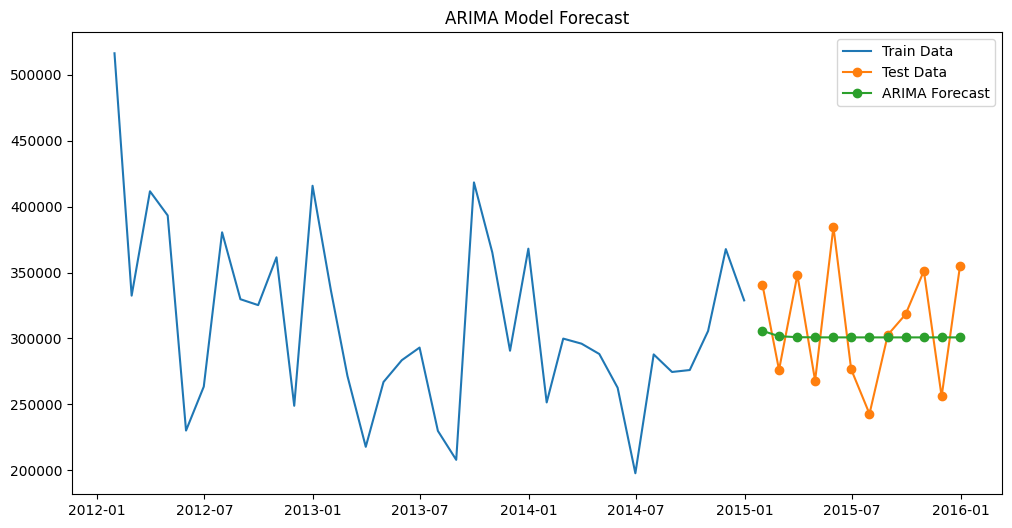

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split data into train and test sets
train_data = monthly_data['Sales'][:-12]  # Training: all except the last 12 months
test_data = monthly_data['Sales'][-12:]   # Testing: last 12 months

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=(1, 1, 1))  # Adjust (p, d, q) based on ACF/PACF plots
arima_result = arima_model.fit()

# Make predictions
arima_forecast = arima_result.forecast(steps=12)

# Evaluate the model
mae = mean_absolute_error(test_data, arima_forecast)
rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))

print(f"ARIMA Model - MAE: {mae}, RMSE: {rmse}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data', marker='o')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', marker='o')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX Model - MAE: 45683.1416342112, RMSE: 57042.82088198991


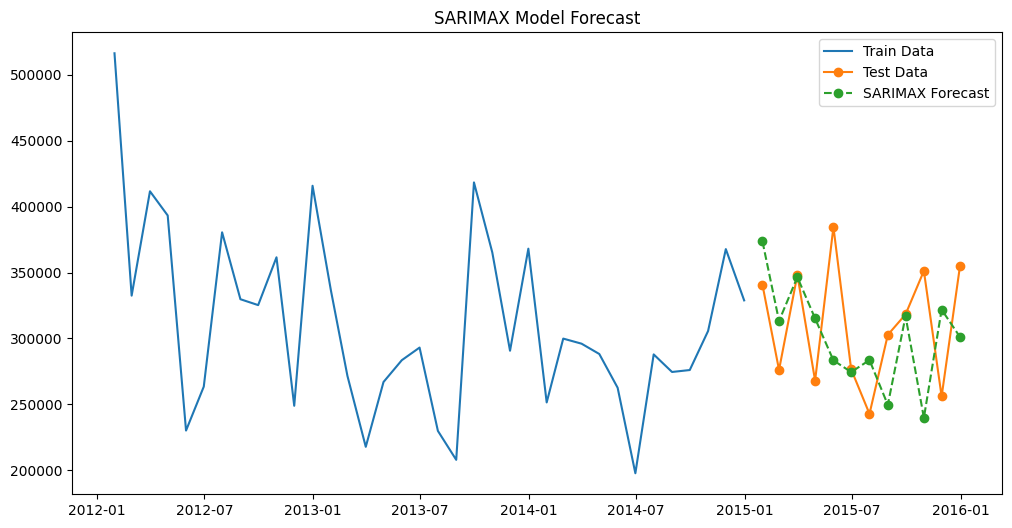

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Add exogenous variable (e.g., Profit) and fit SARIMAX
train_exog = monthly_data['Profit'][:-12]
test_exog = monthly_data['Profit'][-12:]

sarimax_model = SARIMAX(train_data, exog=train_exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result = sarimax_model.fit()

# Make predictions
sarimax_forecast = sarimax_result.forecast(steps=12, exog=test_exog)

# Evaluate SARIMAX
mae_sarimax = mean_absolute_error(test_data, sarimax_forecast)
rmse_sarimax = np.sqrt(mean_squared_error(test_data, sarimax_forecast))

print(f"SARIMAX Model - MAE: {mae_sarimax}, RMSE: {rmse_sarimax}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data', marker='o')
plt.plot(test_data.index, sarimax_forecast, label='SARIMAX Forecast', marker='o', linestyle='--')
plt.title('SARIMAX Model Forecast')
plt.legend()
plt.show()


In [ ]:
!pip install pmdarima prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu85fd9wc/oscgdvl_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu85fd9wc/n_61a3x7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50299', 'data', 'file=/tmp/tmpu85fd9wc/oscgdvl_.json', 'init=/tmp/tmpu85fd9wc/n_61a3x7.json', 'output', 'file=/tmp/tmpu85fd9wc/prophet_modeluhupl4bo/prophet_model-20250115142808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


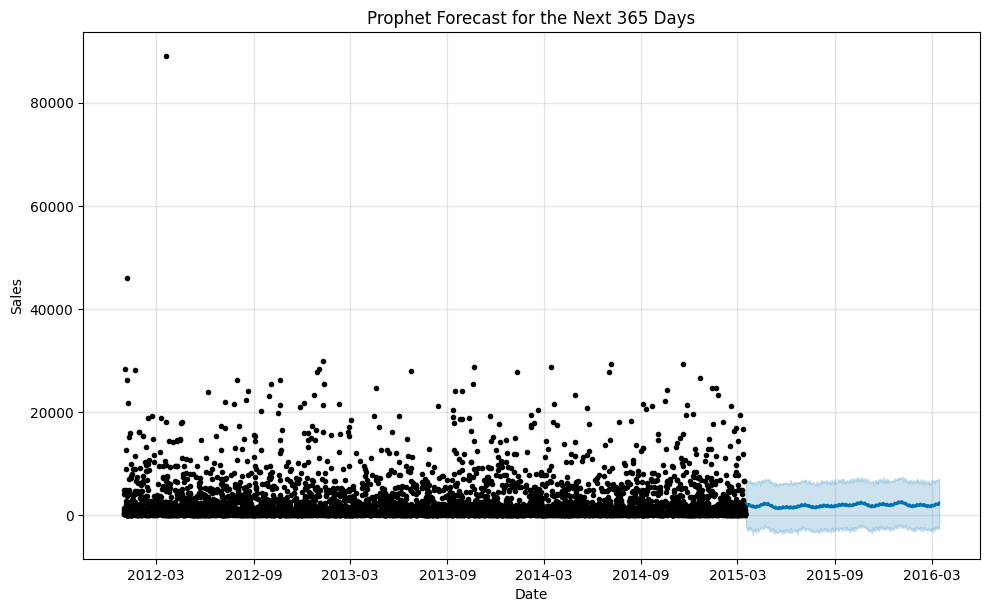

In [ ]:


from prophet import Prophet
import matplotlib.pyplot as plt

# Rename columns to match Prophet's expected input format
prophet_df = data.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})


# Step 6: Split the Data
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Split data into training and testing sets
train_prophet = prophet_df[:train_size]
test_prophet = prophet_df[train_size:]

# Initialize and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(train_prophet)

# Create a future dataframe for the next 365 days
future_1year = model_prophet.make_future_dataframe(periods=365, freq='D')

# Generate predictions
forecast_1year = model_prophet.predict(future_1year)

# Plot the forecast for only the next 365 days
forecast_1year_filtered = forecast_1year[forecast_1year['ds'] > train_prophet['ds'].max()]
model_prophet.plot(forecast_1year_filtered)
plt.title("Prophet Forecast for the Next 365 Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu85fd9wc/6b3pp3t6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu85fd9wc/n7lu0uxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52033', 'data', 'file=/tmp/tmpu85fd9wc/6b3pp3t6.json', 'init=/tmp/tmpu85fd9wc/n7lu0uxt.json', 'output', 'file=/tmp/tmpu85fd9wc/prophet_modelfb_diqjv/prophet_model-20250115142621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



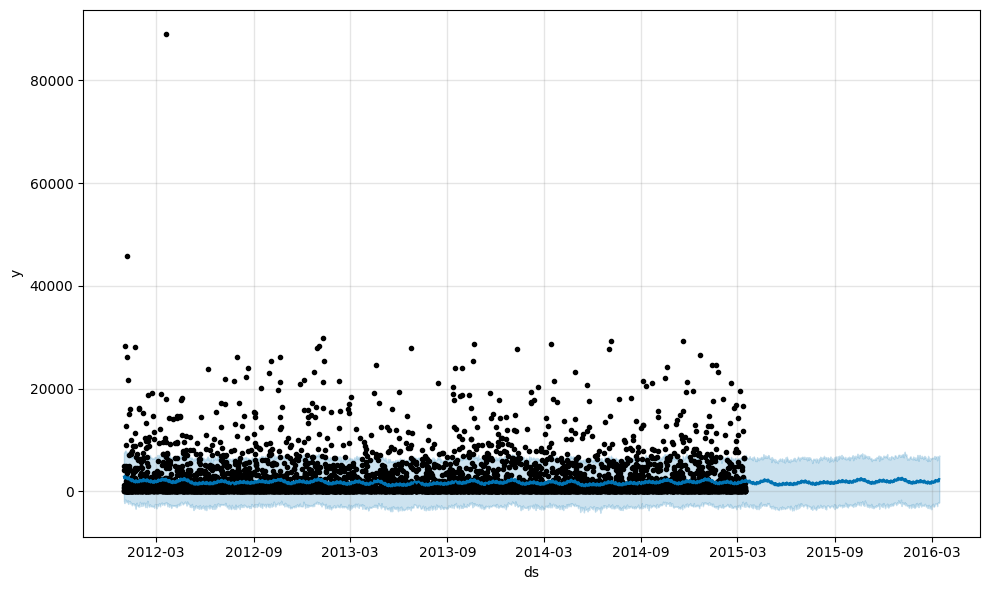

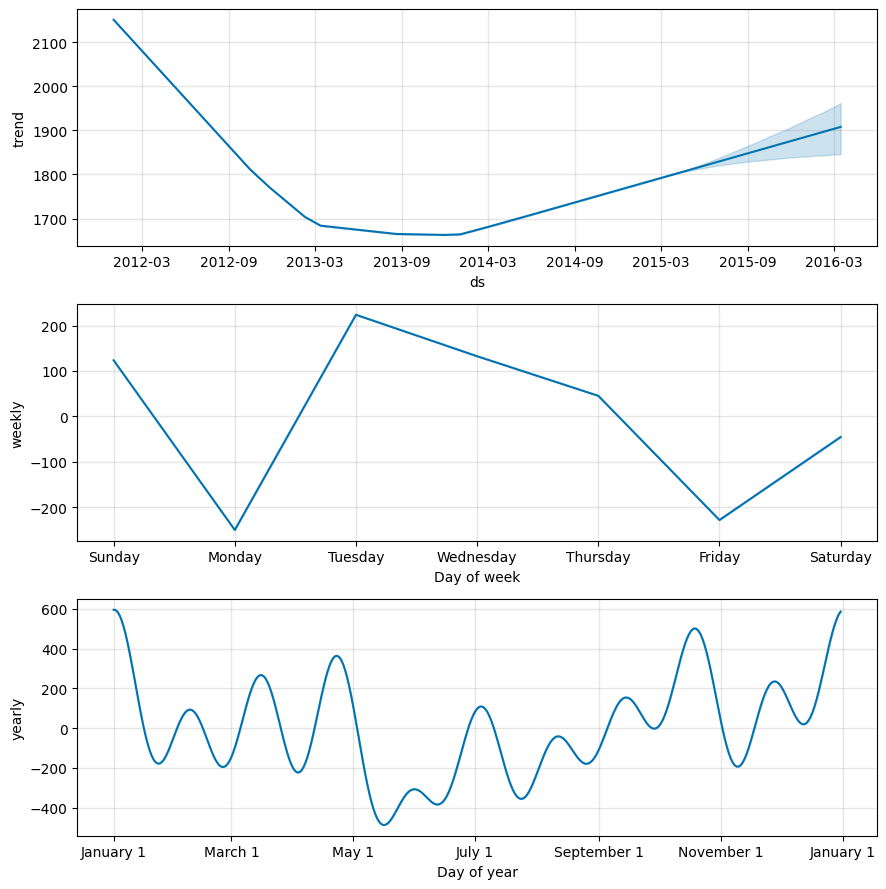

In [ ]:

# Rename columns to match Prophet's expected input format
prophet_df = data.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Split data into training and testing sets
train_prophet = prophet_df[:train_size]
test_prophet = prophet_df[train_size:]

# Initialize and fit the Prophet model
m = Prophet()
m.fit(train_prophet)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)
fig = m.plot_components(forecast)

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

plot_components_plotly(m, forecast)

correction of prophet on weekly basis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel('walmart.xlsx')
df=data[['Order Date','Sales']]

In [4]:
df.isnull().sum()

,0
Order Date,0
Sales,0


In [5]:
df_prophet = df[['Order Date', 'Sales']].copy()
df_prophet.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [7]:
#aggregating sales data on a weekly basis
df_weekly = df_prophet.resample('W', on='ds').sum().reset_index()


#display the aggregated weekly data
df_weekly.head()

,ds,y
0,2012-01-01,1052.8400
1,2012-01-08,193971.4365
2,2012-01-15,100202.6600
3,2012-01-22,120648.7240
4,2012-01-29,63851.8890


In [8]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_weekly)

https://docs.google.com/spreadsheets/d/1fkC-9-88KfEc0wYRKMnXuFhVlAzawVGIdtGR-fSnuHs#gid=0


In [13]:
split_point = int(len(df_weekly) *0.8)

train_data = df_weekly[:split_point]
test_data = df_weekly[split_point:]

#display the range of dates for training and testing sets
train_date_range = (train_data['ds'].min(), train_data['ds'].max())
test_date_range = (test_data['ds'].min(), test_data['ds'].max())

train_date_range, test_date_range


((Timestamp('2012-01-01 00:00:00'), Timestamp('2015-03-15 00:00:00')),
 (Timestamp('2015-03-22 00:00:00'), Timestamp('2016-01-03 00:00:00')))

In [14]:
train_date_range

(Timestamp('2012-01-01 00:00:00'), Timestamp('2015-03-15 00:00:00'))

In [15]:
test_date_range

(Timestamp('2015-03-22 00:00:00'), Timestamp('2016-01-03 00:00:00'))

In [16]:
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model on the training data
model.fit(train_data)

# Create a DataFrame for future predictions (including the test period)
future = model.make_future_dataframe(periods=12, freq='W-MON')

# Generate forecasts
forecast = model.predict(future)

# Display the forecasted data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4c30x0w/x6ls1wj2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4c30x0w/cydee3vv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48379', 'data', 'file=/tmp/tmpk4c30x0w/x6ls1wj2.json', 'init=/tmp/tmpk4c30x0w/cydee3vv.json', 'output', 'file=/tmp/tmpk4c30x0w/prophet_model8bneq33v/prophet_model-20250117125119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:51:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
175,2015-05-04,63692.413274,29528.310209,101527.755897
176,2015-05-11,55309.502709,19966.566476,90732.638139
177,2015-05-18,51912.731147,16088.949964,86485.613038
178,2015-05-25,52433.482752,15635.248651,88249.271358
179,2015-06-01,50794.745803,16558.253896,87690.587970


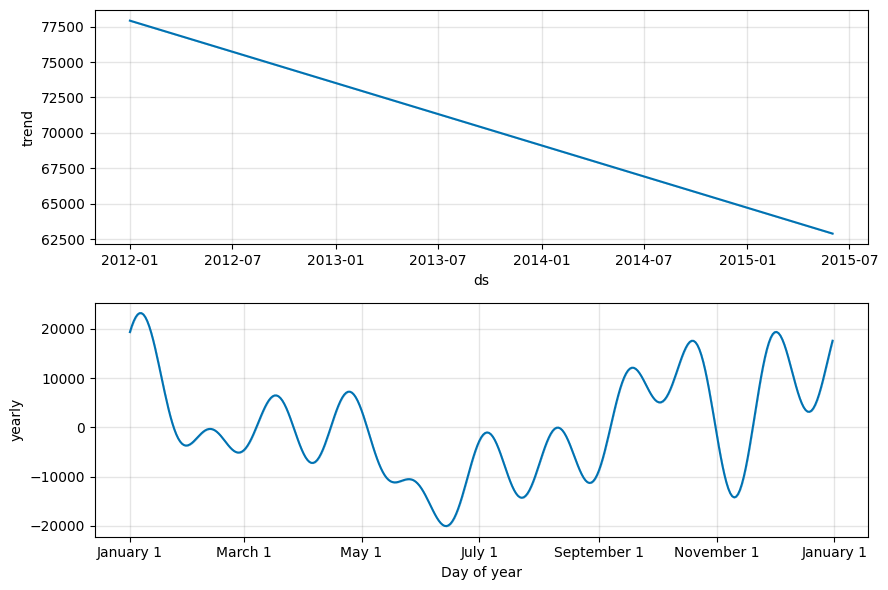

In [17]:
#test_data
fig = model.plot_components(forecast)
plt.show()


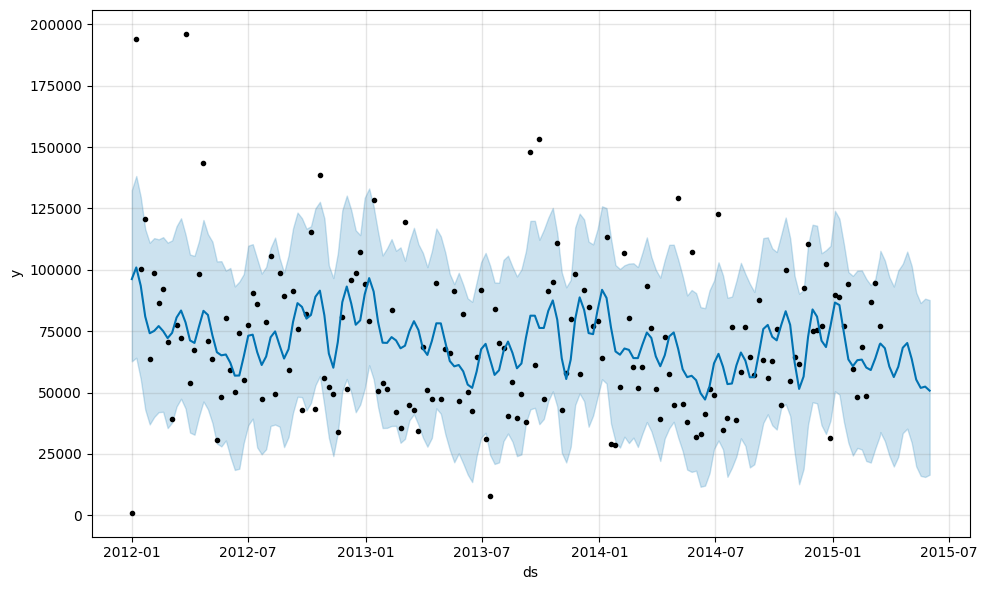

In [18]:
# Plot the forecast
fig = model.plot(forecast)
fig.show()

# Plot the forecast components (trend, seasonality)
# fig_components = model.plot_components(forecast)
# fig_components.show()


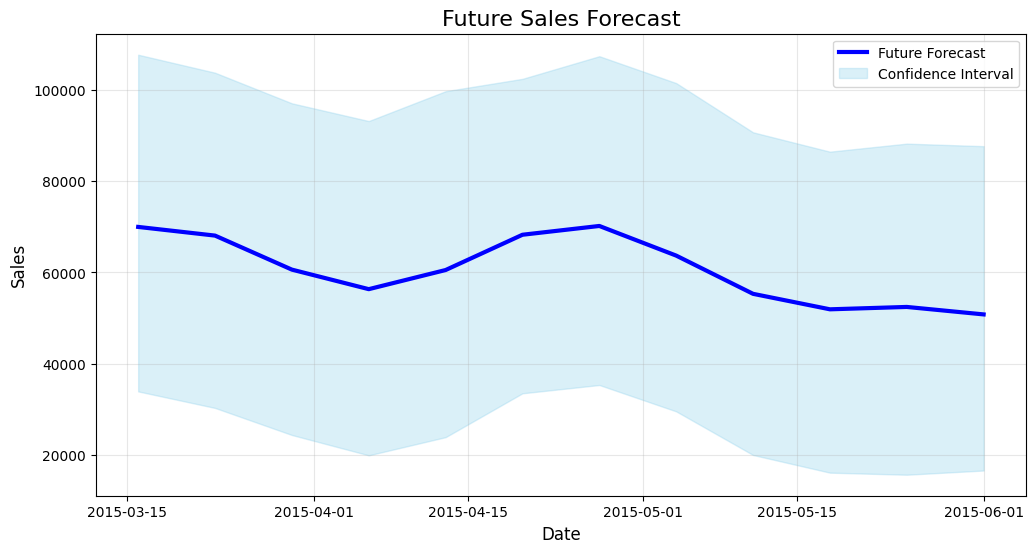

In [19]:
# Filter only future forecasted data
future_forecast = forecast[forecast['ds'] > train_data['ds'].max()]

# Check if future_forecast is empty
if future_forecast.empty:
    print("No future data available for plotting. Please check the filtering logic.")
else:
    # Plot the future forecast
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the forecasted future line
    ax.plot(
        future_forecast['ds'],
        future_forecast['yhat'],
        label='Future Forecast',
        color='blue',
        linewidth=3,
        linestyle='-'
    )

    # Highlight confidence intervals for the future forecast
    ax.fill_between(
        future_forecast['ds'],
        future_forecast['yhat_lower'],
        future_forecast['yhat_upper'],
        color='skyblue',
        alpha=0.3,
        label='Confidence Interval'
    )

    # Add labels, legend, and grid
    ax.set_title('Future Sales Forecast', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Sales', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

    # Display the plot
    plt.show()


Enter the number of weeks to forecast: 13
            ds          yhat    yhat_lower     yhat_upper
168 2015-03-16  69983.638460  33633.219566  107000.229555
169 2015-03-23  68080.106372  31538.986775  107519.687323
170 2015-03-30  60616.884197  24563.680440   97708.103484
171 2015-04-06  56331.829422  19820.555757   92619.050385
172 2015-04-13  60529.757548  25912.372969   99295.158561
173 2015-04-20  68266.195784  33644.521923  103365.133398
174 2015-04-27  70193.412292  34483.552097  106832.911234
175 2015-05-04  63692.413274  26281.648092  100291.160133
176 2015-05-11  55309.502709  18511.047971   93458.970783
177 2015-05-18  51912.731147  14002.593718   85718.335935
178 2015-05-25  52433.482752  17618.323407   88158.406105
179 2015-06-01  50794.745803  13253.264389   81237.630438
180 2015-06-08  45538.215039  11468.115576   84499.002109


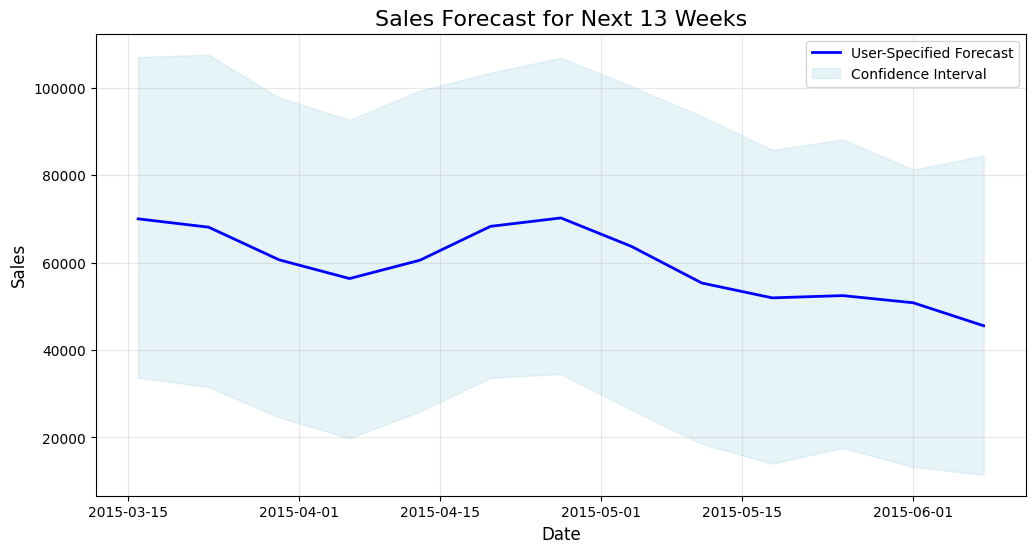

In [20]:
# User input for forecasting
import datetime

# Ask the user for the future date or weeks to forecast
input_weeks = int(input("Enter the number of weeks to forecast: "))

# Generate a future DataFrame based on user input
future = model.make_future_dataframe(periods=input_weeks, freq='W-MON')

# Predict future sales
forecast = model.predict(future)

# Filter forecast data for user-defined range
last_date = train_data['ds'].max()
future_forecast = forecast[forecast['ds'] > last_date]

# Display future forecast
print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plot the future forecast
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the forecasted line
ax.plot(
    future_forecast['ds'],
    future_forecast['yhat'],
    label='User-Specified Forecast',
    color='blue',
    linewidth=2
)

# Highlight confidence intervals
ax.fill_between(
    future_forecast['ds'],
    future_forecast['yhat_lower'],
    future_forecast['yhat_upper'],
    color='lightblue',
    alpha=0.3,
    label='Confidence Interval'
)

# Add labels, legend, and grid
ax.set_title(f"Sales Forecast for Next {input_weeks} Weeks", fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.show()


In [21]:
from joblib import dump

# Save the trained Prophet model
dump(model, 'prophet_sales_model.joblib')

print("Model saved as 'prophet_sales_model.joblib'")


Model saved as 'prophet_sales_model.joblib'


In [22]:
!ls /content


prophet_sales_model.joblib  sample_data  walmart.xlsx
